## 라이브러리

In [531]:
import pandas as pd
import pathlib
import glob
import warnings
warnings.filterwarnings( 'ignore' )

## 데이터 불러오기

In [532]:
DATA_DIR = "data"
path = pathlib.Path(DATA_DIR)
files = path.glob('*.xlsx')
data = []

for i in files:
  data.append(pd.read_excel(i, sheet_name=0))

In [533]:
df = data[0]
df.head()

,No,Trial,ModelID,Feature,Command,Trajectory,CuttingSpeed,SpindleSpeed,CuttingDepth,Timestamp,...,Yload,Zload,S1load,Block,rValue,iValue,jValue,XDirection,YDirection,ZDirection
0,1,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:20.624Z,...,5,12,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
1,2,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:20.905Z,...,4,10,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
2,3,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.202Z,...,5,9,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
3,4,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.498Z,...,5,10,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
4,5,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.794Z,...,4,9,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D


## 데이터 전처리
- 필요 컬럼 추출
- 아웃라이어 제거
- 정규화
- 데이터 split

### 필요 컬럼 추출

In [534]:
df

,No,Trial,ModelID,Feature,Command,Trajectory,CuttingSpeed,SpindleSpeed,CuttingDepth,Timestamp,...,Yload,Zload,S1load,Block,rValue,iValue,jValue,XDirection,YDirection,ZDirection
0,1,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:20.624Z,...,5,12,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
1,2,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:20.905Z,...,4,10,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
2,3,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.202Z,...,5,9,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
3,4,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.498Z,...,5,10,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
4,5,1,Profile1_G01_App,Profile1,G01,App,76.2,1500,1.5,2014-10-30T21:33:21.794Z,...,4,9,3,Z-1.5000,NaN,NaN,NaN,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168074,168075,12,Hole2_G01_Feed,Hole2,G01,Feed,88.9,1750,1.5,2014-11-20T01:14:30.514Z,...,3,7,44,Y10.8000,NaN,NaN,NaN,NaN,NaN,D
168075,168076,12,Hole2_G01_Feed,Hole2,G01,Feed,88.9,1750,1.5,2014-11-20T01:14:30.813Z,...,3,7,51,Y10.8000,NaN,NaN,NaN,NaN,NaN,D
168076,168077,12,Hole2_G01_Feed,Hole2,G01,Feed,88.9,1750,1.5,2014-11-20T01:14:31.101Z,...,7,5,53,Y10.8000,NaN,NaN,NaN,NaN,NaN,D
168077,168078,12,Hole2_G01_Back,Hole2,G01,Back,88.9,1750,1.5,2014-11-20T01:14:31.417Z,...,3,47,34,Y10.8000,NaN,NaN,NaN,NaN,NaN,I


In [535]:
data_df = df[["Trial", "ModelID", "CuttingSpeed", "SpindleSpeed", "CuttingDepth", "Power"]]
data_df

,Trial,ModelID,CuttingSpeed,SpindleSpeed,CuttingDepth,Power
0,1,Profile1_G01_App,76.2,1500,1.5,2914.816
1,1,Profile1_G01_App,76.2,1500,1.5,2353.216
2,1,Profile1_G01_App,76.2,1500,1.5,2169.088
3,1,Profile1_G01_App,76.2,1500,1.5,2201.344
4,1,Profile1_G01_App,76.2,1500,1.5,2208.128
...,...,...,...,...,...,...
168074,12,Hole2_G01_Feed,88.9,1750,1.5,2620.288
168075,12,Hole2_G01_Feed,88.9,1750,1.5,2685.888
168076,12,Hole2_G01_Feed,88.9,1750,1.5,2728.832
168077,12,Hole2_G01_Back,88.9,1750,1.5,2792.384


- 모델 다섯개 정도 사용

In [536]:
selected_model = data_df.groupby(["ModelID"]).count()[:5].index.to_list()
selected_model

['Hole1_G01_App',
 'Hole1_G01_Back',
 'Hole1_G01_Feed',
 'Hole1_G01_Ret',
 'Hole2_G01_App']

In [537]:
selected_model_df = data_df.loc[data_df["ModelID"].isin(selected_model)]
selected_model_df

,Trial,ModelID,CuttingSpeed,SpindleSpeed,CuttingDepth,Power
15560,1,Hole1_G01_App,76.2,1500,1.5,2269.632
15561,1,Hole1_G01_App,76.2,1500,1.5,2233.792
15562,1,Hole1_G01_App,76.2,1500,1.5,2235.008
15563,1,Hole1_G01_App,76.2,1500,1.5,2235.200
15564,1,Hole1_G01_App,76.2,1500,1.5,2234.112
...,...,...,...,...,...,...
168008,12,Hole1_G01_Feed,88.9,1750,1.5,2224.256
168009,12,Hole1_G01_Feed,88.9,1750,1.5,2232.640
168010,12,Hole1_G01_Feed,88.9,1750,1.5,2235.264
168011,12,Hole1_G01_Feed,88.9,1750,1.5,2245.568


### 아웃라이어 제거

In [538]:
upper_bound = selected_model_df["Power"] <= 2700
lower_bound = 2000 <= selected_model_df["Power"]
selected_model_df = selected_model_df.loc[upper_bound & lower_bound]
selected_model_df

,Trial,ModelID,CuttingSpeed,SpindleSpeed,CuttingDepth,Power
15560,1,Hole1_G01_App,76.2,1500,1.5,2269.632
15561,1,Hole1_G01_App,76.2,1500,1.5,2233.792
15562,1,Hole1_G01_App,76.2,1500,1.5,2235.008
15563,1,Hole1_G01_App,76.2,1500,1.5,2235.200
15564,1,Hole1_G01_App,76.2,1500,1.5,2234.112
...,...,...,...,...,...,...
168008,12,Hole1_G01_Feed,88.9,1750,1.5,2224.256
168009,12,Hole1_G01_Feed,88.9,1750,1.5,2232.640
168010,12,Hole1_G01_Feed,88.9,1750,1.5,2235.264
168011,12,Hole1_G01_Feed,88.9,1750,1.5,2245.568


### 정규화
- CuttingSpeed, SpindleSpeed, CuttingDepth

In [539]:
# from sklearn import preprocessing

# std_scaler = preprocessing.StandardScaler().fit(selected_model_df.iloc[:, 2:5])
# selected_model_df.iloc[:, 2:5] = std_scaler.transform(selected_model_df.iloc[:, 2:5])
# selected_model_df

### 데이터 split

trial을 기준으로 각각 split

In [540]:
temp = selected_model_df.groupby(["ModelID", "Trial"]).count()["CuttingSpeed"].to_dict()
check = {}

for x, y in temp.keys():
  if x not in check.keys():
    check[x] = []
  check[x].append(y)

for key, value in check.items():
  if len(value) != 12:
    print(f"{key}'s trial : {value}")

Hole1_G01_Back's trial : [1, 2, 3, 6, 7, 8, 10, 11, 12]
Hole1_G01_Ret's trial : [1, 3, 4, 6, 7, 8, 10, 12]
Hole2_G01_App's trial : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [570]:
check

{'Hole1_G01_App': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'Hole1_G01_Back': [1, 2, 3, 6, 7, 8, 10, 11, 12],
 'Hole1_G01_Feed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'Hole1_G01_Ret': [1, 3, 4, 6, 7, 8, 10, 12],
 'Hole2_G01_App': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [582]:
for key in check.keys():
  temp = selected_model_df.loc[selected_model_df["ModelID"] == key]
  train_num = int(len(check[key])*0.7)
  print(f"{key} modelID's train trial : {[i for i in check[key] if i <= train_num]}")
  print(f"{key} modelID's test trial : {[i for i in check[key] if i > train_num]}")

Hole1_G01_App modelID's train trial : [1, 2, 3, 4, 5, 6, 7, 8]
Hole1_G01_App modelID's test trial : [9, 10, 11, 12]
Hole1_G01_Back modelID's train trial : [1, 2, 3, 6]
Hole1_G01_Back modelID's test trial : [7, 8, 10, 11, 12]
Hole1_G01_Feed modelID's train trial : [1, 2, 3, 4, 5, 6, 7, 8]
Hole1_G01_Feed modelID's test trial : [9, 10, 11, 12]
Hole1_G01_Ret modelID's train trial : [1, 3, 4]
Hole1_G01_Ret modelID's test trial : [6, 7, 8, 10, 12]
Hole2_G01_App modelID's train trial : [1, 2, 3, 4, 5, 6, 7]
Hole2_G01_App modelID's test trial : [8, 9, 10, 11]


In [596]:
def split_dataset(selected_model_df, trial_dict, ModelID, train_ratio):  
  temp = selected_model_df.loc[selected_model_df["ModelID"] == ModelID]
  train_num = int(len(check[ModelID])*train_ratio)
  train_df = temp.loc[temp["Trial"] <= train_num]
  test_df = temp.loc[temp["Trial"] > train_num]
  return train_df.iloc[:, 1:], test_df.iloc[:, 1:]

In [597]:
X_train = []; y_train = []; X_test = []; y_test = [];

for ind in range(len(selected_model)):
  train, test = split_dataset(selected_model_df, check, selected_model[ind], 0.7)
  y_train.append(train.pop("Power"))
  X_train.append(train)
  y_test.append(test.pop("Power").reset_index(drop=True))
  X_test.append(test)

## 모델

In [554]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.model_selection import cross_val_score

### Polynomial Regression

In [555]:
poly_X_train = []; poly_X_test = [];

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
train_poly = PolynomialFeatures(degree=3); test_poly = PolynomialFeatures(degree=3)
for X in X_train:
  poly_ftr = train_poly.fit_transform(X.iloc[:, 1:])
  poly_ftr = pd.concat([X["ModelID"].reset_index(drop=True), pd.DataFrame(poly_ftr)], axis=1)
  poly_X_train.append(poly_ftr)

for X in X_test:
  poly_ftr = test_poly.fit_transform(X.iloc[:, 1:])
  poly_X_test.append(pd.DataFrame(poly_ftr))

In [556]:
lr_prediction = {}

for ind in range(len(poly_X_train)):
  name = poly_X_train[ind]["ModelID"][0]
  lr = LinearRegression()
  lr.fit(poly_X_train[ind].loc[:, 0:], y_train[ind])
  neg_mse_scores = cross_val_score(lr, poly_X_train[ind].loc[:, 0:], y_train[ind], scoring="neg_mean_squared_error", cv = 5)
  lr_pred = lr.predict(poly_X_test[ind].loc[:, 0:])
  lr_prediction[name] = lr_pred

  rmse = np.sqrt(-1 * neg_mse_scores)
  
  print(f"{lr.__class__.__name__}-{name}'s rmse: {rmse.mean()}")

LinearRegression-Hole1_G01_App's rmse: 92.60375818014583
LinearRegression-Hole1_G01_Back's rmse: 95.44362531698002
LinearRegression-Hole1_G01_Feed's rmse: 162.98260429629713
LinearRegression-Hole1_G01_Ret's rmse: 164.1626124197498
LinearRegression-Hole2_G01_App's rmse: 49.2081143311449


### MLPRegressor

In [557]:
regr_prediction = {}

for ind in range(len(poly_X_train)):
  name = X_train[ind].loc[:, "ModelID"].head(1).values[0]
  regr = MLPRegressor(random_state=1, max_iter=500)
  regr.fit(X_train[ind].iloc[:, 1:], y_train[ind])
  neg_mse_scores = cross_val_score(regr, X_train[ind].iloc[:, 1:], y_train[ind], scoring="neg_mean_squared_error", cv=5)
  regr_pred = regr.predict(X_test[ind].iloc[:, 1:])
  regr_prediction[name] = regr_pred
  
  rmse = np.sqrt(-1 * neg_mse_scores)
  
  print(f"{regr.__class__.__name__}-{name}'s rmse: {rmse.mean()}")

MLPRegressor-Hole1_G01_App's rmse: 228.8106860523299
MLPRegressor-Hole1_G01_Back's rmse: 290.3740134132305
MLPRegressor-Hole1_G01_Feed's rmse: 286.02695446413867
MLPRegressor-Hole1_G01_Ret's rmse: 147.7861860541181
MLPRegressor-Hole2_G01_App's rmse: 238.17355640355026


## 시각화

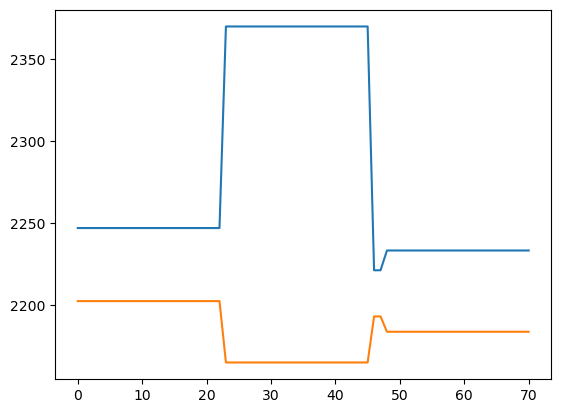

In [558]:
import matplotlib.pyplot as plt
plt.plot(lr_prediction["Hole1_G01_App"])
plt.plot(regr_prediction["Hole1_G01_App"])

In [633]:
selected_model_df_10 = selected_model_df[selected_model_df["Trial"] == 10]
selected_model_df_10_dict = selected_model_df_10.groupby("ModelID").count()["CuttingSpeed"].to_dict()

lr_visual = []
regr_visual = []
pred_visual = []

for ind, (key, value) in enumerate(lr_prediction.items()):
  num = selected_model_df_10_dict[key]
  lr_visual.extend(value[:num])
  regr_visual.extend(regr_prediction[key][:num])
  print(len(regr_prediction[key][:num]))
  pred_visual.extend(y_test[ind][:num])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

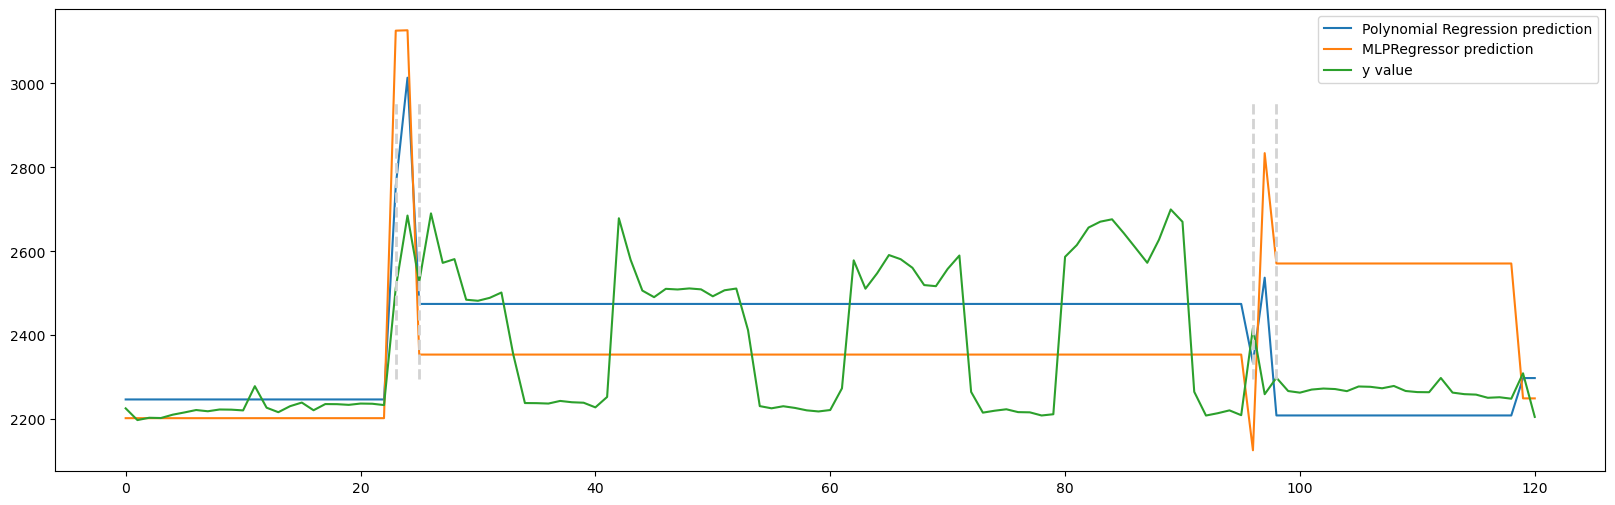

In [659]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(lr_visual, label="Polynomial Regression prediction")
plt.plot(regr_visual, label="MLPRegressor prediction")
plt.plot(pred_visual, label="y value")

count = list(selected_model_df_10_dict.values())[0]
for i in list(selected_model_df_10_dict.values())[1:]:
  plt.axvline(count, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
  count += i

plt.legend()
plt.plot